## Analysis of Rainfall and Drought Trends in Kyrgyzstan (2000–2023)

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Kyrgyzstan, a mountainous country in Central Asia, relies heavily on natural water resources for agriculture, hydropower, and daily consumption. However, climate change and regional weather shifts are increasingly influencing precipitation patterns. This project analyzes historical data on rainfall and temperature from 2000 to 2023 to identify trends, drought events, and potential risks, while proposing solutions to improve resilience and sustainability.

**Sources:**

Precipitation Data: World Bank Climate Change Knowledge Portal (CRU 0.5-degree monthly data)

Temperature Data: World Bank Climate Change Knowledge Portal (CRU 0.5-degree monthly data)



In [35]:
pr_df = pd.read_csv('pr_2000_2023_region_monthly.csv')

tas_df = pd.read_csv('tas_2000_2023.csv')

annual_tas_df = pd.read_csv('temperature_annual_1901_2023.csv')





In [52]:
tas_df

,code,name,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,KGZ,Kyrgyz Republic,-12.01,-10.34,-3.42,7.28,9.79,12.43,15.61,16.06,...,1.58,5.67,9.60,15.26,17.99,16.00,10.50,6.23,-0.15,-8.45
1,KGZ.138147294,Chuy,-10.03,-8.83,-2.12,8.66,11.30,14.40,17.69,17.89,...,3.09,7.06,11.16,17.15,20.12,17.87,12.09,7.84,1.42,-6.51
2,KGZ.1381746,Batken,-6.93,-5.42,0.20,10.29,12.46,15.62,18.44,18.74,...,5.93,8.96,12.82,18.64,21.17,18.91,13.38,9.20,4.18,-3.47
3,KGZ.1381748,Jalal-Abad,-8.30,-6.62,-0.17,10.43,12.92,15.99,18.67,18.68,...,5.09,8.92,13.09,18.87,21.22,18.67,13.05,8.72,3.11,-4.85
4,KGZ.1381749,Naryn,-15.68,-13.70,-5.87,5.14,7.49,9.74,13.25,14.09,...,-1.35,3.59,7.15,12.47,15.52,13.91,8.69,4.33,-3.03,-11.76
5,KGZ.1381750,Osh,-11.26,-9.51,-2.80,7.52,9.88,12.52,15.65,16.21,...,2.51,6.23,10.02,15.53,18.17,16.28,10.96,6.69,0.75,-7.65
6,KGZ.1381751,Talas,-10.09,-8.77,-2.41,8.47,11.07,14.45,17.27,17.18,...,2.94,6.89,11.21,17.23,19.81,17.06,11.24,6.69,1.26,-6.50
7,KGZ.1381752,Ysyk-Kol,-15.05,-13.43,-6.15,4.72,7.56,9.62,13.07,13.70,...,-1.55,2.63,6.65,12.41,15.17,13.56,7.99,3.89,-3.14,-11.78


In [53]:
annual_tas_df

,code,name,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,KGZ,Kyrgyz Republic,1.04,1.88,0.25,1.15,0.62,1.46,0.62,1.16,...,2.02,3.46,3.64,2.95,2.76,3.59,2.78,3.59,3.98,4.28


In [51]:
pr_df

,name,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,Kyrgyz Republic,26.05,16.05,19.48,38.18,46.13,40.16,36.67,27.68,24.78,...,20.15,38.85,41.47,44.80,23.71,46.43,24.55,22.69,26.51,38.45
1,Chuy,23.55,18.09,18.04,30.06,52.69,36.07,33.07,23.70,22.35,...,22.95,42.05,50.74,35.65,19.51,34.51,23.30,26.96,29.70,38.50
2,Batken,65.72,34.92,44.93,69.48,38.58,27.77,22.23,8.55,13.83,...,35.49,50.03,44.26,36.89,12.26,37.29,8.77,35.33,52.17,81.63
3,Jalal-Abad,40.44,20.88,27.30,52.17,49.79,35.31,33.20,14.21,20.43,...,31.02,52.81,35.11,41.71,17.33,43.42,17.01,31.71,38.21,64.78
4,Naryn,10.91,9.81,11.99,22.52,42.02,39.98,36.83,34.63,22.46,...,13.17,31.76,42.72,43.75,26.75,48.55,27.93,14.84,16.25,17.55
5,Osh,36.15,17.88,24.14,52.14,46.28,37.32,31.91,19.34,24.42,...,20.12,36.41,34.29,46.07,15.95,39.65,18.78,23.49,29.12,50.29
6,Talas,39.66,21.53,22.86,42.74,58.00,38.22,34.31,15.45,20.45,...,28.22,51.96,37.77,39.99,19.31,50.58,17.54,29.36,39.53,63.78
7,Ysyk-Kol,5.44,7.63,7.66,24.19,44.16,53.53,50.63,49.57,37.62,...,9.30,27.44,45.65,56.28,38.68,59.39,39.70,14.43,11.04,7.45


In [ ]:

tas_long = tas_df.melt(id_vars=["code", "name"], var_name="date", value_name="temperature")


tas_long["year"] = tas_long["date"].str[:4].astype(int)
tas_long["month"] = tas_long["date"].str[5:7].astype(int)


tas_long = tas_long[["code", "name", "year", "month", "temperature"]]


pr_df = pd.read_csv("pr_2000_2023_region_monthly.csv")


pr_long = pr_df.melt(id_vars=["name"], var_name="date", value_name="precipitation")


pr_long["year"] = pr_long["date"].str[:4].astype(int)
pr_long["month"] = pr_long["date"].str[5:7].astype(int)


print(pr_long.head())


              name     date  precipitation  year  month
0  Kyrgyz Republic  2000-01          26.05  2000      1
1             Chuy  2000-01          23.55  2000      1
2           Batken  2000-01          65.72  2000      1
3       Jalal-Abad  2000-01          40.44  2000      1
4            Naryn  2000-01          10.91  2000      1


In [ ]:

pr_df = pd.read_csv("pr_2000_2023_region_monthly.csv")


pr_long = pr_df.melt(id_vars=["name"], var_name="date", value_name="precipitation")


pr_long["year"] = pr_long["date"].str[:4].astype(int)
pr_long["month"] = pr_long["date"].str[5:7].astype(int)

pr_long = pr_long[["name", "year", "month", "precipitation"]]


print(pr_long.head())


              name  year  month  precipitation
0  Kyrgyz Republic  2000      1          26.05
1             Chuy  2000      1          23.55
2           Batken  2000      1          65.72
3       Jalal-Abad  2000      1          40.44
4            Naryn  2000      1          10.91


# Line Chart with Moving Average (Smoothed Trend)


/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

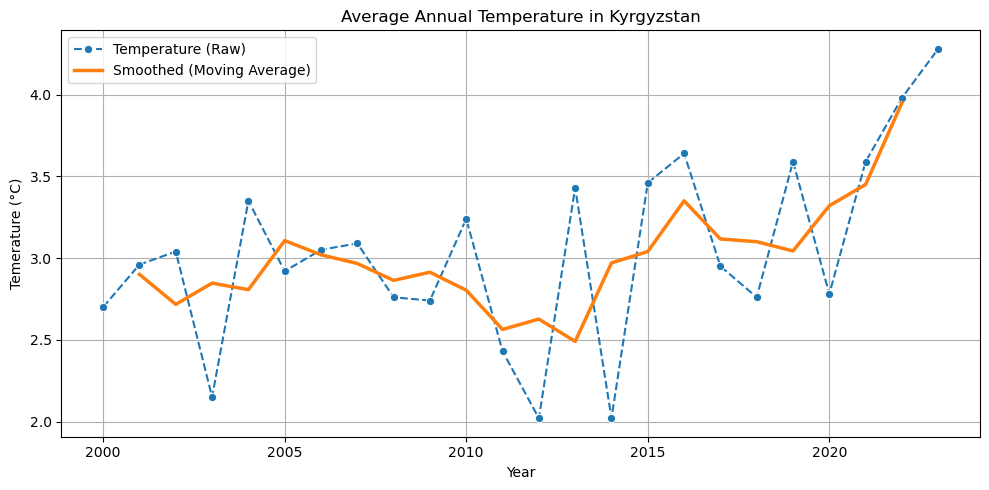

In [43]:
columns_to_keep = [col for col in annual_tas_df.columns if col[:4].isdigit() and 2000 <= int(col[:4]) <= 2023]
df_filtered = annual_tas_df[columns_to_keep + ['code', 'name']]

df_long_all = df_filtered.melt(id_vars=["code", "name"], var_name="year", value_name="temperature")
df_long_all["year"] = df_long_all["year"].str[:4].astype(int)

# Group by years
avg_by_year = df_long_all.groupby("year")["temperature"].mean().reset_index()

# Avg on 3 years
avg_by_year["temp_smoothed"] = avg_by_year["temperature"].rolling(window=3, center=True).mean()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_by_year, x="year", y="temperature", label="Temperature (Raw)", linestyle="--", marker="o")
sns.lineplot(data=avg_by_year, x="year", y="temp_smoothed", label="Smoothed (Moving Average)", linewidth=2.5)
plt.title("Average Annual Temperature in Kyrgyzstan")
plt.xlabel("Year")
plt.ylabel("Temerature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**As we can see, the temperature is increasing every year.**

/var/folders/f7/v5vd1rtj26d3n3dh5q51l9j80000gn/T/ipykernel_18572/591425418.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_filtered["year"] = pr_filtered["month"].dt.year
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexatt

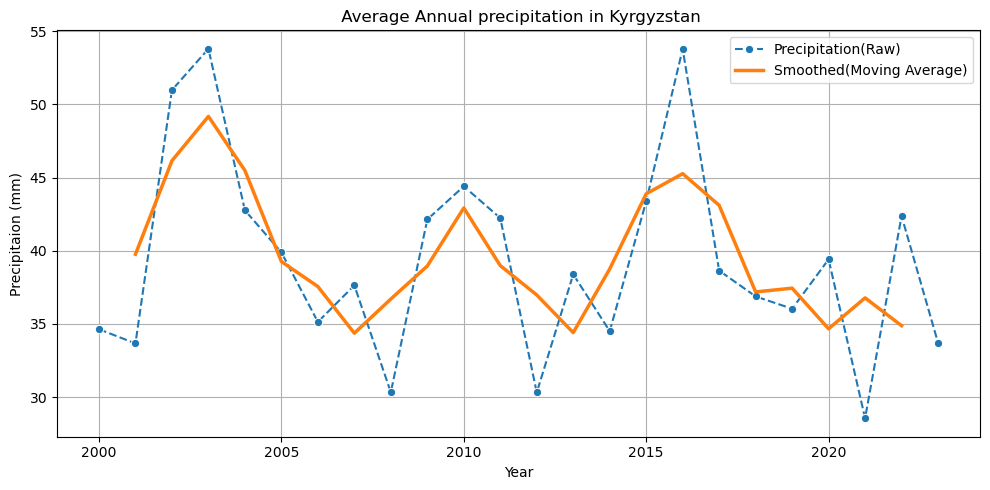

In [44]:

precip_ts = pd.read_csv("precipitation_timeseries.csv")

pr_long = precip_ts.melt(id_vars=["code", "name"], var_name="month", value_name="precipitation")
pr_long["month"] = pd.to_datetime(pr_long["month"], format="%Y-%m")

pr_filtered = pr_long[(pr_long["month"].dt.year >= 2000) & (pr_long["month"].dt.year <= 2023)]

#Group by years
pr_filtered["year"] = pr_filtered["month"].dt.year
pr_avg_by_year = pr_filtered.groupby("year")["precipitation"].mean().reset_index()

# Avg
pr_avg_by_year["precip_smoothed"] = pr_avg_by_year["precipitation"].rolling(window=3, center=True).mean()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=pr_avg_by_year, x="year", y="precipitation", label="Precipitation(Raw)", linestyle="--", marker="o")
sns.lineplot(data=pr_avg_by_year, x="year", y="precip_smoothed", label="Smoothed(Moving Average)", linewidth=2.5)
plt.title(" Average Annual precipitation in Kyrgyzstan")
plt.xlabel("Year")
plt.ylabel("Precipitaion (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**and therefore there is less and less precipitation**

# Line Chart with Categorized Scatterplot and Trendline



/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


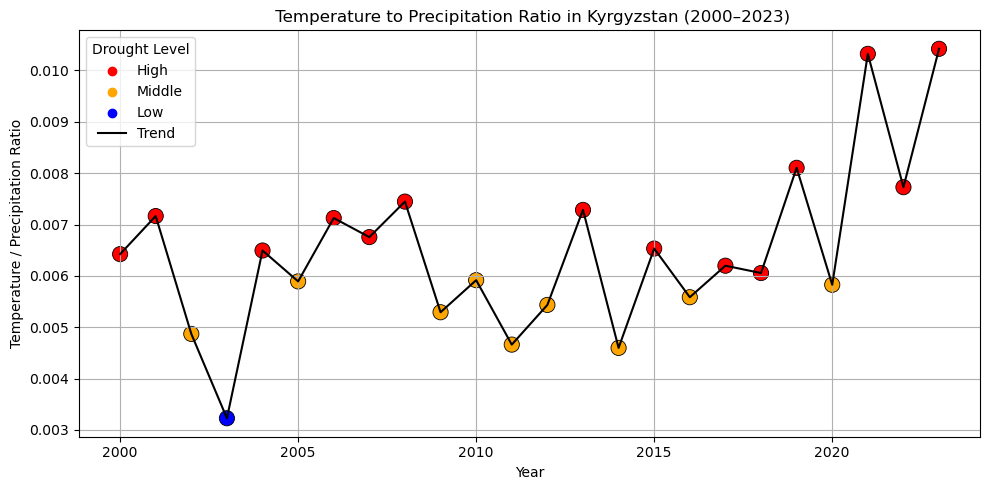

In [47]:
tas_long = tas_df.melt(id_vars=["code", "name"], var_name="year", value_name="temperature")
tas_long["year"] = tas_long["year"].str[:4].astype(int)
tas_kg = tas_long[tas_long["name"] == "Kyrgyz Republic"]
avg_by_year = tas_kg.groupby("year")["temperature"].mean().reset_index()

# Percipitation data
pr_df = pd.read_csv("pr_2000_2023_region_monthly.csv")
pr_long = pr_df.melt(id_vars=["name"], var_name="date", value_name="precipitation")
pr_long["year"] = pr_long["date"].str[:4].astype(int)
pr_kg = pr_long[pr_long["name"] == "Kyrgyz Republic"]
pr_avg_by_year = pr_kg.groupby("year")["precipitation"].sum().reset_index()

# Groupby and merge
combined = pd.merge(avg_by_year, pr_avg_by_year, on="year", how="inner")
combined["temp_to_precip_ratio"] = combined["temperature"] / combined["precipitation"]

# Classification
def classify_ratio(val):
    if val < 0.0045:
        return "Low"
    elif val < 0.006:
        return "Middle"
    else:
        return "High"

combined["drought_level"] = combined["temp_to_precip_ratio"].apply(classify_ratio)

# Visualisation
plt.figure(figsize=(10, 5))
palette = {"Low": "blue", "Middle": "orange", "High": "red"}
sns.scatterplot(
    data=combined,
    x="year",
    y="temp_to_precip_ratio",
    hue="drought_level",
    palette=palette,
    s=120,
    edgecolor="black",
    linewidth=0.6,
    marker="o"
)

sns.lineplot(data=combined, x="year", y="temp_to_precip_ratio", color="black", linewidth=1.5, label="Trend")

plt.title(" Temperature to Precipitation Ratio in Kyrgyzstan (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Temperature / Precipitation Ratio")
plt.grid(True)
plt.legend(title="Drought Level")
plt.tight_layout()
plt.show()


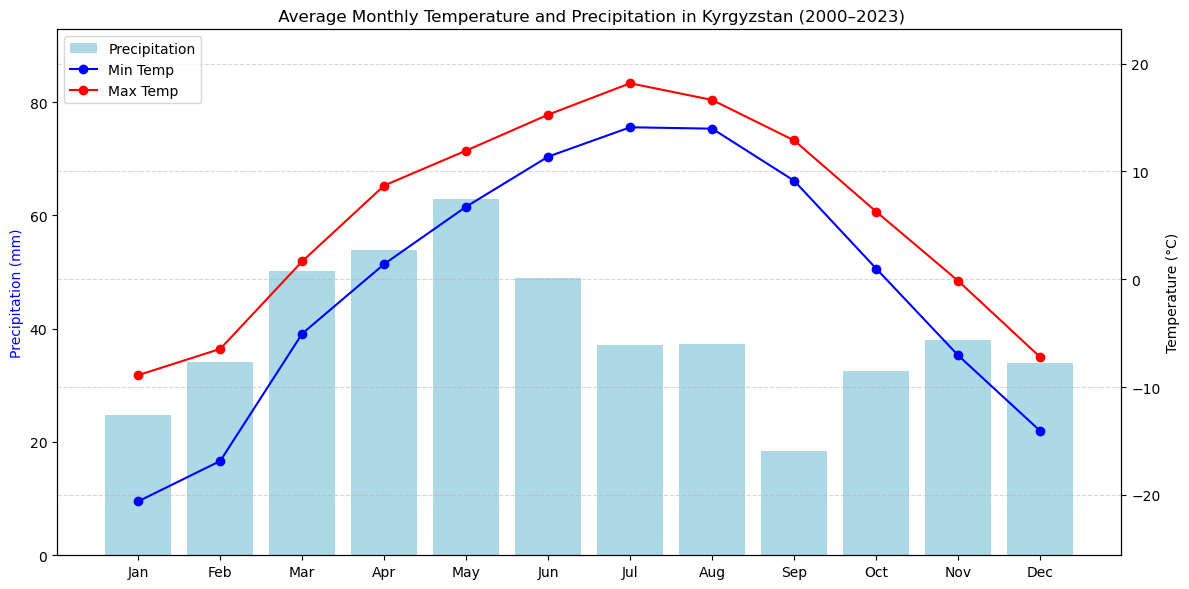

In [ ]:
tas_long = tas_df.melt(id_vars=["code", "name"], var_name="date", value_name="temperature")
tas_long["year"] = tas_long["date"].str[:4].astype(int)
tas_long["month"] = tas_long["date"].str[5:7].astype(int)
tas_kg = tas_long[tas_long["name"] == "Kyrgyz Republic"]


tas_monthly = tas_kg.groupby("month")["temperature"].agg(["min", "max", "mean"]).reset_index()


pr_long = pr_df.melt(id_vars=["name"], var_name="date", value_name="precipitation")
pr_long["year"] = pr_long["date"].str[:4].astype(int)
pr_long["month"] = pr_long["date"].str[5:7].astype(int)
pr_kg = pr_long[pr_long["name"] == "Kyrgyz Republic"]


pr_monthly = pr_kg.groupby("month")["precipitation"].mean().reset_index()


climate_monthly = pd.merge(tas_monthly, pr_monthly, on="month")
climate_monthly.columns = ["Month", "Min Temp (°C)", "Max Temp (°C)", "Avg Temp (°C)", "Avg Precipitation (mm)"]


month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
climate_monthly["Month"] = climate_monthly["Month"].apply(lambda x: month_names[x - 1])


climate_monthly = climate_monthly.set_index("Month").loc[month_names].reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))


bars = ax1.bar(climate_monthly["Month"], climate_monthly["Avg Precipitation (mm)"],
               color="lightblue", label="Precipitation")
ax1.set_ylabel("Precipitation (mm)", color="blue")
ax1.set_ylim(0, climate_monthly["Avg Precipitation (mm)"].max() + 30)


ax2 = ax1.twinx()
ax2.plot(climate_monthly["Month"], climate_monthly["Min Temp (°C)"],
         label="Min Temp", color="blue", marker="o")
ax2.plot(climate_monthly["Month"], climate_monthly["Max Temp (°C)"],
         label="Max Temp", color="red", marker="o")
ax2.set_ylabel("Temperature (°C)", color="black")
ax2.set_ylim(climate_monthly[["Min Temp (°C)", "Max Temp (°C)"]].min().min() - 5,
             climate_monthly[["Min Temp (°C)", "Max Temp (°C)"]].max().max() + 5)


lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax2.legend(lines, labels, loc='upper left')

plt.title(" Average Monthly Temperature and Precipitation in Kyrgyzstan (2000–2023)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/f7/v5vd1rtj26d3n3dh5q51l9j80000gn/T/ipykernel_18572/1163931431.py:23: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


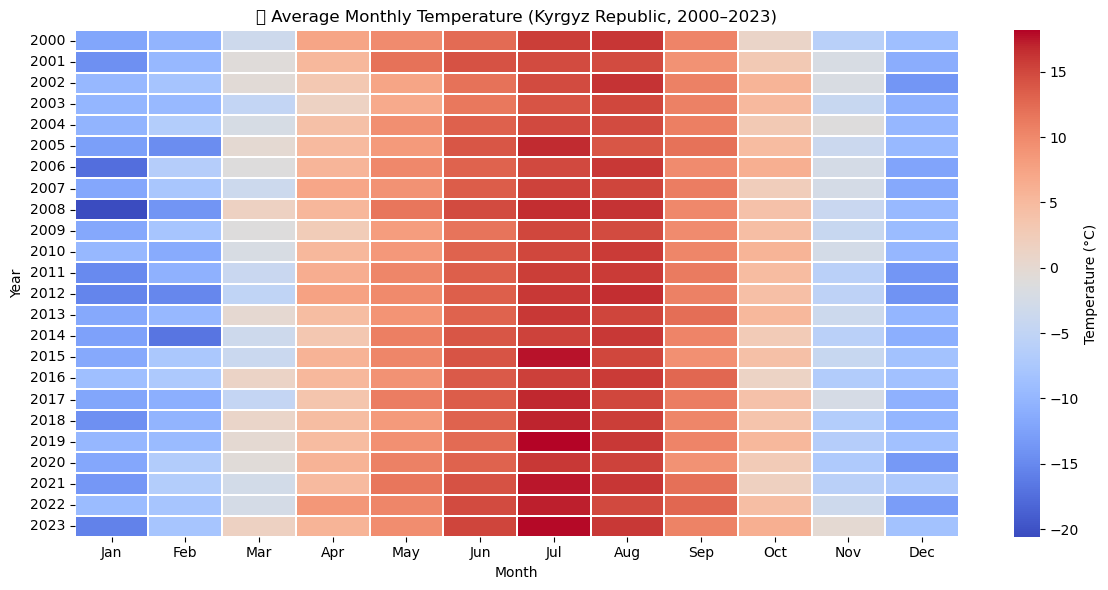

/var/folders/f7/v5vd1rtj26d3n3dh5q51l9j80000gn/T/ipykernel_18572/1163931431.py:32: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
/Users/alexatterson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


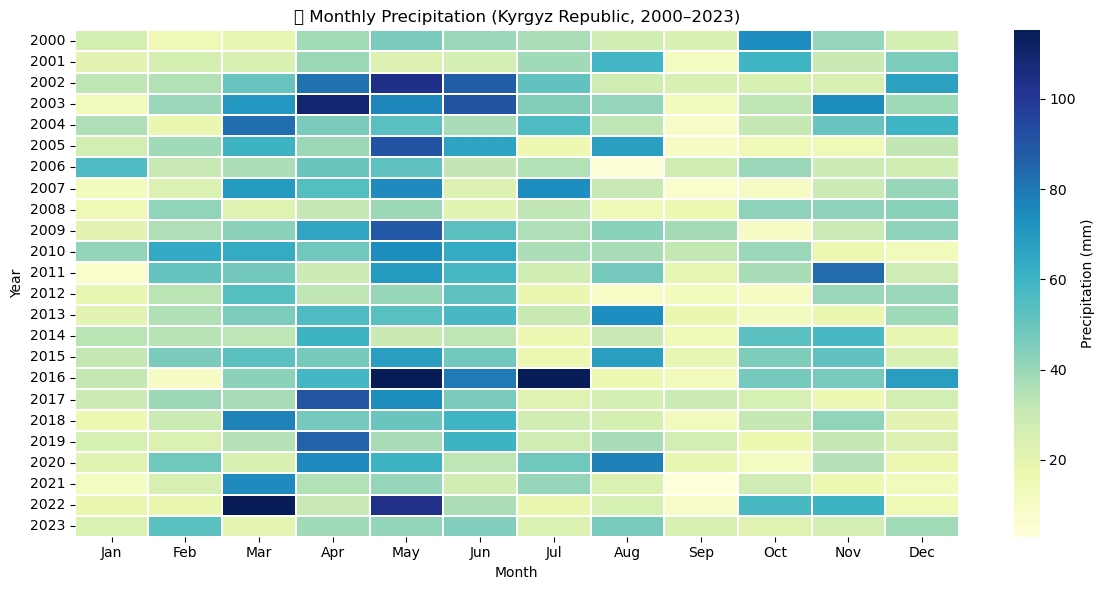

In [ ]:

tas_heatmap = tas_kg.groupby(["year", "month"])["temperature"].mean().reset_index()
tas_pivot = tas_heatmap.pivot(index="year", columns="month", values="temperature")

pr_heatmap = pr_kg.groupby(["year", "month"])["precipitation"].sum().reset_index()
pr_pivot = pr_heatmap.pivot(index="year", columns="month", values="precipitation")


month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
tas_pivot.columns = pr_pivot.columns = month_labels


plt.figure(figsize=(12, 6))
sns.heatmap(tas_pivot, cmap="coolwarm", annot=False, linewidths=0.3, cbar_kws={"label": "Temperature (°C)"})
plt.title("Average Monthly Temperature (Kyrgyz Republic, 2000–2023)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

# Тепловая карта по осадкам
plt.figure(figsize=(12, 6))
sns.heatmap(pr_pivot, cmap="YlGnBu", annot=False, linewidths=0.3, cbar_kws={"label": "Precipitation (mm)"})
plt.title(" Monthly Precipitation (Kyrgyz Republic, 2000–2023)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()
